<a href="https://colab.research.google.com/github/juancamilo9/predicciones-ventas/blob/master/base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')
filename = '/content/drive/MyDrive/sales_predictions.csv'
df = pd.read_csv(filename)

df.head()

Mounted at /content/drive


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
#  ¿Cuántas filas y columnas?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Cuantas Filas y Columnas tiene el DataFrame
Se observa que en total tenemos 12 Columnas y 8522 entradas o filas

# Cuales son los tipos da datos del Dataframe? 


*   Item_Identifier -> Object
*   Item_Weight -> Float64
*   Item_Fat_Content -> object 
*   Item_Visibility -> float64
*   Item_Type -> object 
*   Item_MRP -> float64
*   Outlet_Identifier -> object 
*   Outlet_Establishment_Year -> int64  
*   Outlet_Size ->  object 
*   Outlet_Location_Type -> object 
*   Outlet_Type -> object 
*   Item_Outlet_Sales -> float64




In [3]:
#  ¿Hay duplicados? Si es el caso, eliminen algunos duplicados

df.duplicated().value_counts()

False    8523
dtype: int64

Se ha analizado todo el Dataframe en todas sus entradas y no se han encontrado datos duplicados.

In [4]:
#  ¿Hay duplicados? Si es el caso, eliminen algunos duplicados
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Tenemos datos faltantes en las siguientes columnas: Item_weight faltan 1463 y representan el 17,16% de los datos y Oulet_Size faltan 2410 Representan el 28,27% de los datos

En este punto, no tengo mucha información para tomar una decición acertada, por un lado, los porcentajes de valores faltantes son altos, por lo cual no es aconsejable imputar datos para rellenar estos, y tampoco es buen punto eliminarlos, la manara mas facil y menos perjudicial es creando categorias de 'Vacios'

In [5]:
# Decidan cómo abordar los valores faltantes y cómo hacerlo. 
#(Esto requiere sus criterios, así que expliquen su elección).
df['Outlet_Size'].value_counts()
# El valor más comun es medium

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [6]:

df['Outlet_Size'].fillna('empty', inplace=True)

In [7]:
df['Outlet_Size'].isna().sum()

0

**Valores faltantes para Item_weight**

In [8]:
# introduciremos valores con media(), para mantener el tipo de datos como Float64
median_item_w = df['Item_Weight'].median()
df['Item_Weight'].fillna(median_item_w, inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#  Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent)

Actuación sobre las columnas de tipo object

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [11]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Para la columna Item_Fat_Content, hay diferentes categorás que al agruparlas pueden dar como resultado más favorable:
 

1.   los registros de tipo 'reg' los agruparé con los registros de 'Regular'
2.   Los registros de tipo 'low fat' , 'LF', son expresiones que dentro se suc pontexto actual significan 'Low Fat', serán agrupadas en una sola.




In [12]:
# Remplazo 'LF' por 'Low Fat'
df['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
# Remplazo 'low fat' por 'Low Fat'
df['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
# Remplazo 'reg' por 'Regular'
df['Item_Fat_Content'].replace('reg','Regular',inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [13]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [14]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [15]:
df['Outlet_Size'].value_counts()

Medium    2793
empty     2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [17]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

para 'Outlet_Type' Puedo agrupara los tres tipos de supermercado en uno solo llamado 'supermarket'

In [18]:
df['Outlet_Type'].replace('Supermarket Type1','Supermarket',inplace=True)
df['Outlet_Type'].replace('Supermarket Type2','Supermarket',inplace=True)
df['Outlet_Type'].replace('Supermarket Type3','Supermarket',inplace=True)
df['Outlet_Type'].value_counts()

Supermarket      7440
Grocery Store    1083
Name: Outlet_Type, dtype: int64

# Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [20]:
df['Item_Weight'].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

In [21]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [22]:
df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [23]:
df['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [24]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

**Histogramas para ver la distribucion de diversas características de los productos**

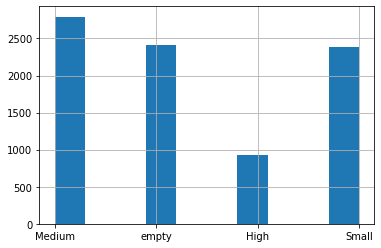

In [25]:

df['Outlet_Size'].hist()

En el Histograma anterior, podemos observar de que ,anera estan distibuidas, en relacion de tamaño los supermercados las entradas en nuesto DataFrame.

**Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.**

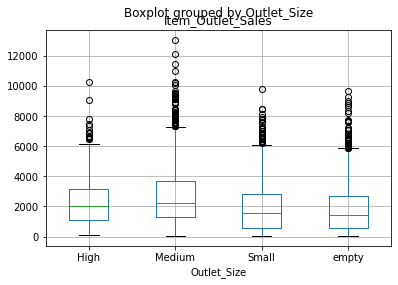

In [28]:
df.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Size')

Para este gráfico, el objetivo era distribuir de manera uniforme, los datos agrupados por ventas de cada item con relación al tamaño de los almacenes, con relación a este gráfico, podriamos decir que los almacenes de mediana superficie presentan una mayor trafico de productos debido a la cantidad de valores atipicos que se observan

**Mapa de calor de la correlación entre las características.**

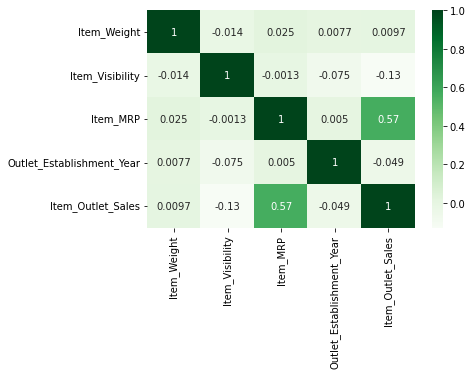

In [30]:
import seaborn as sns
corr = df.corr()

sns.heatmap(corr, cmap = 'Greens', annot = True)

No existe correlación alguna con respecto a cada columna del DataFrame